<a href="https://colab.research.google.com/github/ooitenghe/COVID-19-severity-prediction/blob/main/FYP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning

### 1. Do cleaning on column "SIMPTOM KATEGORI" (Cat 1- Cat 5)


In [ ]:
import pandas as pd
import re

# Load the Excel file
df = pd.read_excel('Covid-19 Dataset 2.xlsx')

# Find and replace the words in the column
df['SIMPTOM KATEGORI'] = df['SIMPTOM KATEGORI'].str.replace(r"CAT5|CAT 5[\s\w:(/,-]*[ ()-w]*]*", 'CAT 5', case=False)
df['SIMPTOM KATEGORI'] = df['SIMPTOM KATEGORI'].str.replace(r"CAT4|CAT 4[\s\w:(/,-]*[ ()-w]*]*", 'CAT 4', case=False)
df['SIMPTOM KATEGORI'] = df['SIMPTOM KATEGORI'].str.replace(r"CAT3|CAT 3[\s\w:(/,-]*[ ()-w]*]*", 'CAT 3', case=False)
df['SIMPTOM KATEGORI'] = df['SIMPTOM KATEGORI'].str.replace(r"CAT2|CAT 2[\s\w:(/,-]*[ ()-w]*]*", 'CAT 2', case=False)
df['SIMPTOM KATEGORI'] = df['SIMPTOM KATEGORI'].str.replace(r"CAT1|CAT 1|[\s\w:(/,-]*[ ()-w]*]*", 'CAT 1', case=False)
df['SIMPTOM KATEGORI'] = df['SIMPTOM KATEGORI'].str.replace(r"(YA|TIADA SIMPTOM|TIDAK BERSIMPTOM|TIADA|TIDAK|SIHAT|X SIASAT LAGI|BELUM SIASAT LAGI|BELUM HABIS SIASAT)", "")
df['SIMPTOM KATEGORI'] = df['SIMPTOM KATEGORI'].str.replace(r"(-|NIL|nil)", "")
df['SIMPTOM KATEGORI'] = df['SIMPTOM KATEGORI'].str.strip()

# Save the updated data back to the Excel file
df.to_csv('Covid-19 Dataset 2.csv', index=False)

<ipython-input-1-9326c732961b>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['SIMPTOM KATEGORI'] = df['SIMPTOM KATEGORI'].str.replace(r"CAT 5[\s\w:(/,-]*[ ()-w]*]*", 'CAT 5', case=False)
<ipython-input-1-9326c732961b>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['SIMPTOM KATEGORI'] = df['SIMPTOM KATEGORI'].str.replace(r"CAT 4[\s\w:(/,-]*[ ()-w]*]*", 'CAT 4', case=False)
<ipython-input-1-9326c732961b>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df['SIMPTOM KATEGORI'] = df['SIMPTOM KATEGORI'].str.replace(r"CAT 3[\s\w:(/,-]*[ ()-w]*]*", 'CAT 3', case=False)
<ipython-input-1-9326c732961b>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df['SIMPTOM KATEGORI'] = df['SIMPTOM KATEGORI'].str.replace(r"CAT 2[\s\w:(/,-]*[ ()-w]*]*", 'CAT 2', case=False)
<ipython-input-1-9326c7329

### 2. Do classification on Jenis Simptom - CTH : DEMAM, BATUK, SELESEMA

In [ ]:
import pandas as pd
import re

# Load the data
df = pd.read_csv('Covid-19 Dataset 2.csv')

# Define categories and keywords
categories = {'SAKIT TEKAK: YA / TIDAK': ['tekak', 'sore', 'throat', 'sorethroat', 'kerongkong'],
              'DEMAM : YA / TIDAK': ['demam', 'fever', 'feverish'],
              'SELESEMA : YA / TIDAK': ['selesema', 'flu', 'selsema', 'hidung', 'running', 'nose', 'bersin', 'semput'],
              'HILANG DERIA RASA : YA / TIDAK': ['rasa', 'taste', 'tasteless'],
              'HILANG DERIA BAU : YA / TIDAK': ['bau', 'anosmia', 'smell', 'berbau'],
              'BATUK : YA / TIDAK': ['batuk', 'kahak', 'cough'],
              'SESAK NAFAS : YA / TIDAK': ['sesak', 'nafas', 'sukar', 'bernafas', 'susah', 'bernafas', 'sob', 'shortness', 'breath', 'difficulty', 'breathing'],
              'CIRIT BIRIT : YA / TIDAK': ['cirit', 'birit', 'diarrhea'],
              'LAIN-LAIN : YA / TIDAK': ['back', 'pain', 'bodyache', 'headache', 'muscle', 'soreness', 'chest', 'tightness', 'skin', 'rash', 'nasal', 'congestion', 'lung', 'inflammation',
                                         'tulang','paru', 'jantung', 'kepala', 'dada', 'badan', 'body', 'otot', 'belakang', 'telinga', 'pinggang',  'perut', 'mata', 'tangan',
                                         'letih', 'keletihan', 'penat', 'kepenatan', 'fatigue', 'lemah', 'weak', 'lelah', 'pening', 'pengsan', 'dizziness', 'selera', 'makan', 'gastrik', 'loya', 'muntah',
                                         'lesu', 'lethargy', 'lethargic', 'pitam', 'kebas', 'menggigil', 'gigil', 'ulser', 'appetite', 'sengal', 'ruam', 'myalgia', 'sinus', 'selesa',
                                         'mual', 'sendi', 'lenguh', 'dengue', 'urti', 'alergik', 'darah', 'kencing', 'manis', 'arthralgia', 'dehydrated', 'intubate', 'feeding'
                                         ]
            }

# Find and replace the words in the column
df['JENIS SIMPTOM - CTH : DEMAM, BATUK, SELESEMA'].fillna('TIADA', inplace=True)


# Text processing
df['Cleaned_Symptoms'] = df['JENIS SIMPTOM - CTH : DEMAM, BATUK, SELESEMA'].str.lower().str.replace(r'[^\w\s]', '').str.split()


# Categorization
for category, keywords in categories.items():
    df[category] = df['Cleaned_Symptoms'].apply(lambda x: 'YA' if any(word in x for word in keywords) else 'TIDAK')

# Drop intermediate columns if needed
df.drop(columns=['Cleaned_Symptoms'], inplace=True)
df.drop(columns=['JENIS SIMPTOM - CTH : DEMAM, BATUK, SELESEMA'], inplace=True)

# Save the results to a new file if needed
df.to_csv('Covid-19 Dataset 2.csv', index=False)

<ipython-input-2-c89cae854031>:29: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Cleaned_Symptoms'] = df['JENIS SIMPTOM - CTH : DEMAM, BATUK, SELESEMA'].str.lower().str.replace(r'[^\w\s]', '').str.split()


In [ ]:
# Load the another dataset
df = pd.read_excel('Covid-19 Dataset 1.xlsx')
df['SIMPTOM KATEGORI'] = df['SIMPTOM KATEGORI'].str.strip()
df.to_csv('Covid-19 Dataset 1.csv', index=False)

### 3. Combine two CSV files into one

In [ ]:
import pandas as pd

# Load the first CSV file into a DataFrame
df1 = pd.read_csv('Covid-19 Dataset 1.csv')

# Load the second CSV file into a DataFrame
df2 = pd.read_csv('Covid-19 Dataset 2.csv')

# Concatenate the two DataFrames vertically
df_combined = pd.concat([df1, df2], ignore_index=True)

# Save the combined DataFrame to a new CSV file
df_combined.to_csv('Covid-19 Dataset new.csv', index=False)

### 4. Do classification on column "COMORBID either yes or no

In [ ]:
import pandas as pd
import re

# Load the data
df = pd.read_csv('Covid-19 Dataset new.csv')

# Define categories and keywords
categories = {'COMORBID : TIADA / DM / HPT / ASTHMA / KIDNEY FAILURE / HEART ATTACK / DLL':
        ['dm', 'hpt', 'asthma', 'kidney', 'failure', 'heart', 'attack', 'dll', 'diabetes', 'hypertension',
         'stroke', 'cholestrol', 'lung', 'infection','kolestrol', 'tinggi', 'darah', 'schizophrenia','kencing', 'manis',
         'masalah', 'jantung', 'kegagalan', 'buah', 'pinggang', 'infection', 'obesity', 'gout', 'dyslipidemia',
         'adhd', 'hiv', 'problem', 'high', 'colestrol', 'gastrik', 'gdm', 'preggy', 'mengandung', 'obesiti', 'colon', 'cancer',
         'kanser', 'payudara', 'paruparu', 'multiple', 'myeloma', 'oku', 'buta', 'thyroid','hypotension','diabetics', 'blood',
         'pressure', 'hypercholesterolemia','lumpuh', 'tangan','dylisis','craniectomy', 'tumour', 'hpl', 'parkinson', 'disease',
         'breast', 'hyperthyroidism', 'insulin', 'urine', 'sinus', 'prostate', 'anemia', 'g6pd', 'sakit', 'sendi', 'lutut',
         'disorder', 'von', 'willebrand', 'anxiety', 'ocd', 'deaf', 'kulit', 'dyslipedemia', 'ihd', 'dementia', 'adl', 'dependent',
         'batu', 'karang', 'alergik', 'autism', 'ckd', 'jaundice', 'hypothyroid', 'htn', 'tiroid', 'apendix', 'kimo', 'lymphoma',
         'tyhroid', 'luekimia', 'sawan', 'semput', 'hepatitis', 'tyroid', 'hypertiroid', 'pregnant', 'gastric','diabetic', 'tibi',
         'tonsil', 'down', 'sindrom', 'eczema', 'sle', 'diabetis', 'kelenjar', 'pl'] }

# Find and replace the words in the column
df['COMORBID : TIADA / DM / HPT / ASTHMA / KIDNEY FAILURE / HEART ATTACK / DLL'].fillna('TIADA', inplace=True)


# Text processing
df['COMORBID'] = df['COMORBID : TIADA / DM / HPT / ASTHMA / KIDNEY FAILURE / HEART ATTACK / DLL'].str.lower().str.replace(r'[^\w\s]', '').str.split()


# Categorization
for category, keywords in categories.items():
    df[category] = df['COMORBID'].apply(lambda x: 'YA' if any(word in x for word in keywords) else 'TIDAK')

# Drop intermediate columns if needed
df.drop(columns=['COMORBID'], inplace=True)

# Save the results to a new file if needed
df.to_csv('Covid-19 Dataset new 2.csv', index=False)

<ipython-input-3-1399a61cd982>:26: FutureWarning: The default value of regex will change from True to False in a future version.
  df['COMORBID'] = df['COMORBID : TIADA / DM / HPT / ASTHMA / KIDNEY FAILURE / HEART ATTACK / DLL'].str.lower().str.replace(r'[^\w\s]', '').str.split()


# Data Preprocessing

In [ ]:
# Read in data
import pandas as pd
df = pd.read_csv('Covid-19 Dataset new 2.csv')

# Take a look at the data
df.head(10)

,TARIKH,Umur (Tahun),Jantina,SIMPTOM KATEGORI,SAKIT TEKAK: YA / TIDAK,DEMAM : YA / TIDAK,SELESEMA : YA / TIDAK,HILANG DERIA RASA : YA / TIDAK,HILANG DERIA BAU : YA / TIDAK,BATUK : YA / TIDAK,SESAK NAFAS : YA / TIDAK,CIRIT BIRIT : YA / TIDAK,LAIN-LAIN : YA / TIDAK,COMORBID : TIADA / DM / HPT / ASTHMA / KIDNEY FAILURE / HEART ATTACK / DLL
0,5/1/2021,45.0,Lelaki,CAT 1,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK
1,5/1/2021,45.0,Lelaki,CAT 1,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK
2,5/1/2021,37.0,Lelaki,CAT 2,TIDAK,TIDAK,TIDAK,YA,TIDAK,YA,TIDAK,TIDAK,TIDAK,TIDAK
3,5/1/2021,27.0,Perempuan,CAT 1,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK
4,5/1/2021,46.0,Perempuan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TIDAK
5,5/1/2021,44.0,Perempuan,CAT 2,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,YA
6,5/1/2021,63.0,Lelaki,CAT 1,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,YA
7,5/1/2021,19.0,Lelaki,CAT 1,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK
8,5/1/2021,18.0,Lelaki,CAT 2,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,YA,TIDAK,TIDAK,TIDAK,TIDAK
9,5/1/2021,21.0,Lelaki,CAT 2,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,YA,TIDAK,YA,TIDAK,TIDAK


### Handling Noise

In [ ]:
# Handling Noise
df.drop("TARIKH",axis=1,inplace=True)

# Take a look at the data
df.head(10)

,Umur (Tahun),Jantina,SIMPTOM KATEGORI,SAKIT TEKAK: YA / TIDAK,DEMAM : YA / TIDAK,SELESEMA : YA / TIDAK,HILANG DERIA RASA : YA / TIDAK,HILANG DERIA BAU : YA / TIDAK,BATUK : YA / TIDAK,SESAK NAFAS : YA / TIDAK,CIRIT BIRIT : YA / TIDAK,LAIN-LAIN : YA / TIDAK,COMORBID : TIADA / DM / HPT / ASTHMA / KIDNEY FAILURE / HEART ATTACK / DLL
0,45.0,Lelaki,CAT 1,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK
1,45.0,Lelaki,CAT 1,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK
2,37.0,Lelaki,CAT 2,TIDAK,TIDAK,TIDAK,YA,TIDAK,YA,TIDAK,TIDAK,TIDAK,TIDAK
3,27.0,Perempuan,CAT 1,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK
4,46.0,Perempuan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TIDAK
5,44.0,Perempuan,CAT 2,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,YA
6,63.0,Lelaki,CAT 1,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,YA
7,19.0,Lelaki,CAT 1,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK
8,18.0,Lelaki,CAT 2,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,YA,TIDAK,TIDAK,TIDAK,TIDAK
9,21.0,Lelaki,CAT 2,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,YA,TIDAK,YA,TIDAK,TIDAK


### Rename all the column

In [ ]:
# Rename all the column
df = df.rename(columns={'Umur (Tahun)': 'umur'})
df = df.rename(columns={'Jantina': 'jantina'})
df = df.rename(columns={'SIMPTOM KATEGORI': 'simptom kategori'})
df = df.rename(columns={'SAKIT TEKAK: YA / TIDAK': 'sakit tekak'})
df = df.rename(columns={'DEMAM : YA / TIDAK': 'demam'})
df = df.rename(columns={'SELESEMA : YA / TIDAK': 'selesema'})
df = df.rename(columns={'HILANG DERIA RASA : YA / TIDAK': 'hilang deria rasa'})
df = df.rename(columns={'HILANG DERIA BAU : YA / TIDAK': 'hilang deria bau'})
df = df.rename(columns={'BATUK : YA / TIDAK': 'batuk'})
df = df.rename(columns={'SESAK NAFAS : YA / TIDAK': 'sesak nafas'})
df = df.rename(columns={'CIRIT BIRIT : YA / TIDAK': 'cirit birit'})
df = df.rename(columns={'LAIN-LAIN : YA / TIDAK': 'lain-lain'})
df = df.rename(columns={'COMORBID : TIADA / DM / HPT / ASTHMA / KIDNEY FAILURE / HEART ATTACK / DLL': 'komorbid'})

# Take a look at the data
df.head(10)

,umur,jantina,simptom kategori,sakit tekak,demam,selesema,hilang deria rasa,hilang deria bau,batuk,sesak nafas,cirit birit,lain-lain,komorbid
0,45.0,Lelaki,CAT 1,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK
1,45.0,Lelaki,CAT 1,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK
2,37.0,Lelaki,CAT 2,TIDAK,TIDAK,TIDAK,YA,TIDAK,YA,TIDAK,TIDAK,TIDAK,TIDAK
3,27.0,Perempuan,CAT 1,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK
4,46.0,Perempuan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TIDAK
5,44.0,Perempuan,CAT 2,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,YA
6,63.0,Lelaki,CAT 1,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,YA
7,19.0,Lelaki,CAT 1,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK
8,18.0,Lelaki,CAT 2,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,YA,TIDAK,TIDAK,TIDAK,TIDAK
9,21.0,Lelaki,CAT 2,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,YA,TIDAK,YA,TIDAK,TIDAK


### Handle inconsistent data

In [ ]:
class_counts = df.groupby('jantina').size()
print(class_counts)

jantina
LELAKI         156
Lelaki       72975
PEREMPUAN       13
Perempuan    58463
lelaki           2
perempuan        7
dtype: int64


In [ ]:
#change to lowercase and remove leading and trailing spaces (handle inconsistent data)

df['jantina'] = df['jantina'].str.lower().str.strip()
df['simptom kategori'] = df['simptom kategori'].str.lower().str.strip()
df['sakit tekak'] = df['sakit tekak'].str.lower().str.strip()
df['demam'] = df['demam'].str.lower().str.strip()
df['selesema'] = df['selesema'].str.lower().str.strip()
df['hilang deria rasa'] = df['hilang deria rasa'].str.lower().str.strip()
df['hilang deria bau'] = df['hilang deria bau'].str.lower().str.strip()
df['batuk'] = df['batuk'].str.lower().str.strip()
df['sesak nafas'] = df['sesak nafas'].str.lower().str.strip()
df['cirit birit'] = df['cirit birit'].str.lower().str.strip()
df['lain-lain'] = df['lain-lain'].str.lower().str.strip()
df['komorbid'] = df['komorbid'].str.lower().str.strip()

df.head(10)

,umur,jantina,simptom kategori,sakit tekak,demam,selesema,hilang deria rasa,hilang deria bau,batuk,sesak nafas,cirit birit,lain-lain,komorbid
0,45.0,lelaki,cat 1,tidak,tidak,tidak,tidak,tidak,tidak,tidak,tidak,tidak,tidak
1,45.0,lelaki,cat 1,tidak,tidak,tidak,tidak,tidak,tidak,tidak,tidak,tidak,tidak
2,37.0,lelaki,cat 2,tidak,tidak,tidak,ya,tidak,ya,tidak,tidak,tidak,tidak
3,27.0,perempuan,cat 1,tidak,tidak,tidak,tidak,tidak,tidak,tidak,tidak,tidak,tidak
4,46.0,perempuan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tidak
5,44.0,perempuan,cat 2,tidak,tidak,tidak,tidak,tidak,tidak,tidak,tidak,tidak,ya
6,63.0,lelaki,cat 1,tidak,tidak,tidak,tidak,tidak,tidak,tidak,tidak,tidak,ya
7,19.0,lelaki,cat 1,tidak,tidak,tidak,tidak,tidak,tidak,tidak,tidak,tidak,tidak
8,18.0,lelaki,cat 2,tidak,tidak,tidak,tidak,tidak,ya,tidak,tidak,tidak,tidak
9,21.0,lelaki,cat 2,tidak,tidak,tidak,tidak,tidak,ya,tidak,ya,tidak,tidak


### Deal with missing value

In [ ]:
# Check missing value
df.isnull().sum()

umur                  2347
jantina                172
simptom kategori     35401
sakit tekak           1935
demam                 1912
selesema              1912
hilang deria rasa     1912
hilang deria bau      1912
batuk                 1912
sesak nafas           1912
cirit birit           1912
lain-lain             1643
komorbid                 0
dtype: int64

Simptom Kategori

In [ ]:
# simply drop whole row with NaN in the "Simptom Kategori" column
df.dropna(subset=["simptom kategori"], axis=0, inplace = True)

# reset index, because we droped few rows
df.reset_index(drop = True, inplace = True)

# Check missing value again
df.isnull().sum()

umur                 1717
jantina               120
simptom kategori        0
sakit tekak             0
demam                   0
selesema                0
hilang deria rasa       0
hilang deria bau        0
batuk                   0
sesak nafas             0
cirit birit             0
lain-lain               0
komorbid                0
dtype: int64

Umur

In [ ]:
# Calculate the mean of the 'Age' variable (ignoring null values)
mean_age = int(df['umur'].mean())

# Replace null values in the 'Age' variable with the mean age
df['umur'].fillna(mean_age, inplace=True)

# Convert the 'Age' variable to integer type
df['umur'] = df['umur'].astype(int)

# Check missing value again
df.isnull().sum()

umur                   0
jantina              120
simptom kategori       0
sakit tekak            0
demam                  0
selesema               0
hilang deria rasa      0
hilang deria bau       0
batuk                  0
sesak nafas            0
cirit birit            0
lain-lain              0
komorbid               0
dtype: int64

Jantina

In [ ]:
# Calculate mode of 'Jantina' column
mode_age = df['jantina'].mode().iloc[0]

# Replace null values in 'Jantina' column with mode
df['jantina'].fillna(mode_age, inplace=True)

# Check missing value again
df.isnull().sum()

umur                 0
jantina              0
simptom kategori     0
sakit tekak          0
demam                0
selesema             0
hilang deria rasa    0
hilang deria bau     0
batuk                0
sesak nafas          0
cirit birit          0
lain-lain            0
komorbid             0
dtype: int64

In [ ]:
# Take a look at the data
df.head(10)

,umur,jantina,simptom kategori,sakit tekak,demam,selesema,hilang deria rasa,hilang deria bau,batuk,sesak nafas,cirit birit,lain-lain,komorbid
0,45,lelaki,cat 1,tidak,tidak,tidak,tidak,tidak,tidak,tidak,tidak,tidak,tidak
1,45,lelaki,cat 1,tidak,tidak,tidak,tidak,tidak,tidak,tidak,tidak,tidak,tidak
2,37,lelaki,cat 2,tidak,tidak,tidak,ya,tidak,ya,tidak,tidak,tidak,tidak
3,27,perempuan,cat 1,tidak,tidak,tidak,tidak,tidak,tidak,tidak,tidak,tidak,tidak
4,44,perempuan,cat 2,tidak,tidak,tidak,tidak,tidak,tidak,tidak,tidak,tidak,ya
5,63,lelaki,cat 1,tidak,tidak,tidak,tidak,tidak,tidak,tidak,tidak,tidak,ya
6,19,lelaki,cat 1,tidak,tidak,tidak,tidak,tidak,tidak,tidak,tidak,tidak,tidak
7,18,lelaki,cat 2,tidak,tidak,tidak,tidak,tidak,ya,tidak,tidak,tidak,tidak
8,21,lelaki,cat 2,tidak,tidak,tidak,tidak,tidak,ya,tidak,ya,tidak,tidak
9,25,lelaki,cat 1,tidak,tidak,tidak,tidak,tidak,tidak,tidak,tidak,tidak,tidak


### Change to numeric values

In [ ]:
# change to numeric value
# jantina
df['jantina'] = df['jantina'].map({'lelaki':1, 'perempuan':0})

# sakit tekak
df['sakit tekak'] = df['sakit tekak'].map({'ya':1, 'tidak':0})

# demam
df['demam'] = df['demam'].map({'ya':1, 'tidak':0})

# selesema
df['selesema'] = df['selesema'].map({'ya':1, 'tidak':0})

# hilang deria rasa
df['hilang deria rasa'] = df['hilang deria rasa'].map({'ya':1, 'tidak':0})

# hilang deria bau
df['hilang deria bau'] = df['hilang deria bau'].map({'ya':1, 'tidak':0})

# batuk
df['batuk'] = df['batuk'].map({'ya':1, 'tidak':0})

# sesak nafas
df['sesak nafas'] = df['sesak nafas'].map({'ya':1, 'tidak':0})

# cirit-birit
df['cirit birit'] = df['cirit birit'] = df['cirit birit'].map({'ya':1, 'tidak':0})

# lain-lain
df['lain-lain'] = df['lain-lain'].map({'ya':1, 'tidak':0})

# komorbid
df['komorbid'] = df['komorbid'].map({'ya':1, 'tidak':0})

# Take a look at the data
df.head(10)

,umur,jantina,simptom kategori,sakit tekak,demam,selesema,hilang deria rasa,hilang deria bau,batuk,sesak nafas,cirit birit,lain-lain,komorbid
0,45,1,cat 1,0,0,0,0,0,0,0,0,0,0
1,45,1,cat 1,0,0,0,0,0,0,0,0,0,0
2,37,1,cat 2,0,0,0,1,0,1,0,0,0,0
3,27,0,cat 1,0,0,0,0,0,0,0,0,0,0
4,44,0,cat 2,0,0,0,0,0,0,0,0,0,1
5,63,1,cat 1,0,0,0,0,0,0,0,0,0,1
6,19,1,cat 1,0,0,0,0,0,0,0,0,0,0
7,18,1,cat 2,0,0,0,0,0,1,0,0,0,0
8,21,1,cat 2,0,0,0,0,0,1,0,1,0,0
9,25,1,cat 1,0,0,0,0,0,0,0,0,0,0


### Labeling the data

In [ ]:
# extract the number in simptom kategori
df["simptom kategori"] = df['simptom kategori'].str.extract(r'(\d+[.\d]*)').astype(int)

# Take a look at the data
df.head(10)

,umur,jantina,simptom kategori,sakit tekak,demam,selesema,hilang deria rasa,hilang deria bau,batuk,sesak nafas,cirit birit,lain-lain,komorbid
0,45,1,1,0,0,0,0,0,0,0,0,0,0
1,45,1,1,0,0,0,0,0,0,0,0,0,0
2,37,1,2,0,0,0,1,0,1,0,0,0,0
3,27,0,1,0,0,0,0,0,0,0,0,0,0
4,44,0,2,0,0,0,0,0,0,0,0,0,1
5,63,1,1,0,0,0,0,0,0,0,0,0,1
6,19,1,1,0,0,0,0,0,0,0,0,0,0
7,18,1,2,0,0,0,0,0,1,0,0,0,0
8,21,1,2,0,0,0,0,0,1,0,1,0,0
9,25,1,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Label the Simptom Kategori into '1 = ringan', '2 = sederhana' or '3 = serius'
def getCategory(cat):
    if cat == 1:
        return 1
    if cat == 2:
        return 2
    if cat == 3 or cat == 4 or cat == 5:
        return 3


df['hasil dignosis'] = df['simptom kategori'].apply(getCategory)
df.drop(columns=['simptom kategori'], inplace=True)

# Take a look at the data
df.head(10)

,umur,jantina,sakit tekak,demam,selesema,hilang deria rasa,hilang deria bau,batuk,sesak nafas,cirit birit,lain-lain,komorbid,hasil dignosis
0,45,1,0,0,0,0,0,0,0,0,0,0,1
1,45,1,0,0,0,0,0,0,0,0,0,0,1
2,37,1,0,0,0,1,0,1,0,0,0,0,2
3,27,0,0,0,0,0,0,0,0,0,0,0,1
4,44,0,0,0,0,0,0,0,0,0,0,1,2
5,63,1,0,0,0,0,0,0,0,0,0,1,1
6,19,1,0,0,0,0,0,0,0,0,0,0,1
7,18,1,0,0,0,0,0,1,0,0,0,0,2
8,21,1,0,0,0,0,0,1,0,1,0,0,2
9,25,1,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
print(df.dtypes)

umur                 int64
jantina              int64
sakit tekak          int64
demam                int64
selesema             int64
hilang deria rasa    int64
hilang deria bau     int64
batuk                int64
sesak nafas          int64
cirit birit          int64
lain-lain            int64
komorbid             int64
hasil dignosis       int64
dtype: object


### Data binning

In [ ]:
# Group by age intervals
# Age 0-9=1, Age 10-19=2, Age 20-24=3,Age 25-59=4,Age 60+=5,
def Age(x):
    if(x <= 9):
        return 1
    if(x >= 10 and x <= 19):
        return 2
    if(x >= 20 and x <= 24):
        return 3
    if(x >= 25 and x <= 59):
        return 4
    if(x >= 60):
        return 5

df['umur'] = df['umur'].apply(Age)

# Take a look at the data
df.head(10)

,umur,jantina,sakit tekak,demam,selesema,hilang deria rasa,hilang deria bau,batuk,sesak nafas,cirit birit,lain-lain,komorbid,hasil dignosis
0,4,1,0,0,0,0,0,0,0,0,0,0,1
1,4,1,0,0,0,0,0,0,0,0,0,0,1
2,4,1,0,0,0,1,0,1,0,0,0,0,2
3,4,0,0,0,0,0,0,0,0,0,0,0,1
4,4,0,0,0,0,0,0,0,0,0,0,1,2
5,5,1,0,0,0,0,0,0,0,0,0,1,1
6,2,1,0,0,0,0,0,0,0,0,0,0,1
7,2,1,0,0,0,0,0,1,0,0,0,0,2
8,3,1,0,0,0,0,0,1,0,1,0,0,2
9,4,1,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.to_csv('Covid-19 Cleaned Data.csv', index=False)

# Exploratory Data Analysis

In [ ]:
from pandas import read_csv
df = read_csv('Covid-19 Cleaned Data.csv')

## The shape and datatype of the data

In [ ]:
# Dimensions of data
df.shape

(96387, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96387 entries, 0 to 96386
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   umur               96387 non-null  int64
 1   jantina            96387 non-null  int64
 2   sakit tekak        96387 non-null  int64
 3   demam              96387 non-null  int64
 4   selesema           96387 non-null  int64
 5   hilang deria rasa  96387 non-null  int64
 6   hilang deria bau   96387 non-null  int64
 7   batuk              96387 non-null  int64
 8   sesak nafas        96387 non-null  int64
 9   cirit birit        96387 non-null  int64
 10  lain-lain          96387 non-null  int64
 11  komorbid           96387 non-null  int64
 12  hasil dignosis     96387 non-null  int64
dtypes: int64(13)
memory usage: 9.6 MB


In [ ]:
df.skew()

umur                -1.078824
jantina             -0.188390
sakit tekak          3.224642
demam                0.879046
selesema             1.781138
hilang deria rasa    3.236021
hilang deria bau     2.815735
batuk                1.070325
sesak nafas          7.151225
cirit birit          8.230021
lain-lain            2.818302
komorbid             2.034941
hasil dignosis      -0.171608
dtype: float64

## Summary statistics

In [ ]:
# Statistical summary
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
umur,96387.0,3.430857,1.118681,1.0,3.0,4.0,4.0,5.0
jantina,96387.0,0.546889,0.497799,0.0,0.0,1.0,1.0,1.0
sakit tekak,96387.0,0.075093,0.263543,0.0,0.0,0.0,0.0,1.0
demam,96387.0,0.298816,0.457741,0.0,0.0,0.0,1.0,1.0
selesema,96387.0,0.167471,0.373398,0.0,0.0,0.0,0.0,1.0
hilang deria rasa,96387.0,0.074678,0.262873,0.0,0.0,0.0,0.0,1.0
hilang deria bau,96387.0,0.092367,0.289545,0.0,0.0,0.0,0.0,1.0
batuk,96387.0,0.264081,0.440845,0.0,0.0,0.0,1.0,1.0
sesak nafas,96387.0,0.018478,0.134671,0.0,0.0,0.0,0.0,1.0
cirit birit,96387.0,0.014141,0.118072,0.0,0.0,0.0,0.0,1.0


## Count plot of target

In [ ]:
# Class Distribution
class_counts = df.groupby('hasil dignosis').size()
print(class_counts)

hasil dignosis
1    37686
2    57207
3     1494
dtype: int64


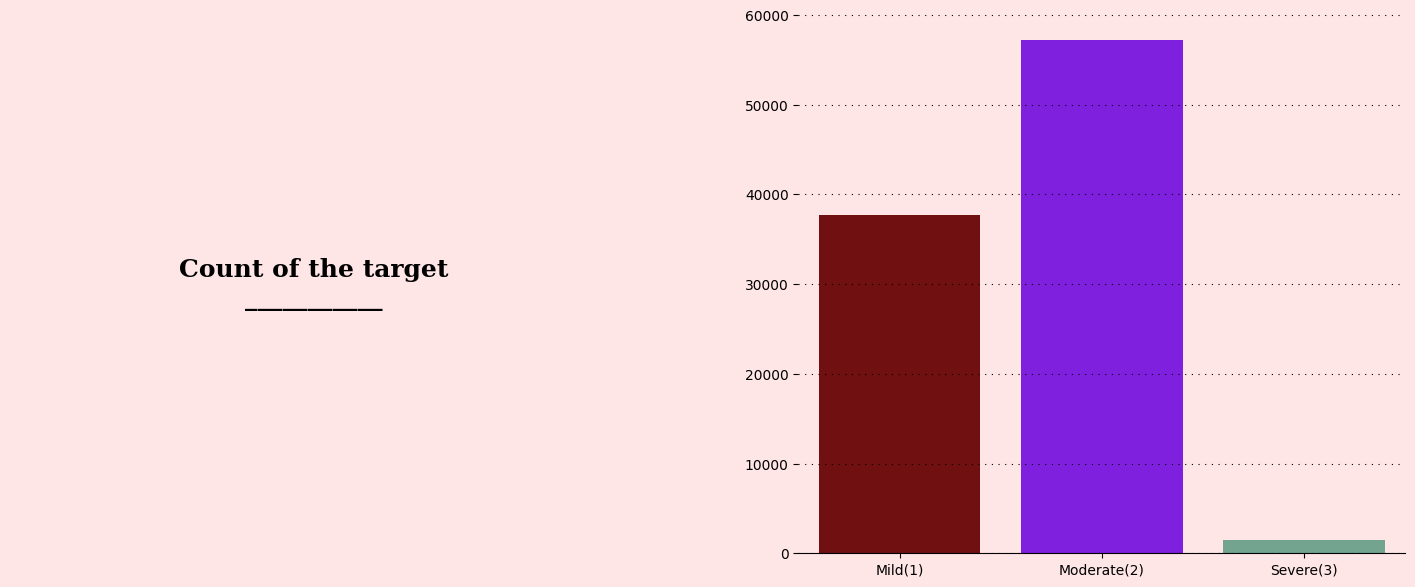

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(18,7))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)

# Title of the plot
ax0.text(0.5,0.5,"Count of the target\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Target Count
ax1.text(0.35,177,"",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=df, x = 'hasil dignosis',palette = color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Mild(1)","Moderate(2)","Severe(3)"])

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

## Count plot of categorical features

<ipython-input-56-a1eb9ab4bb1d>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax);


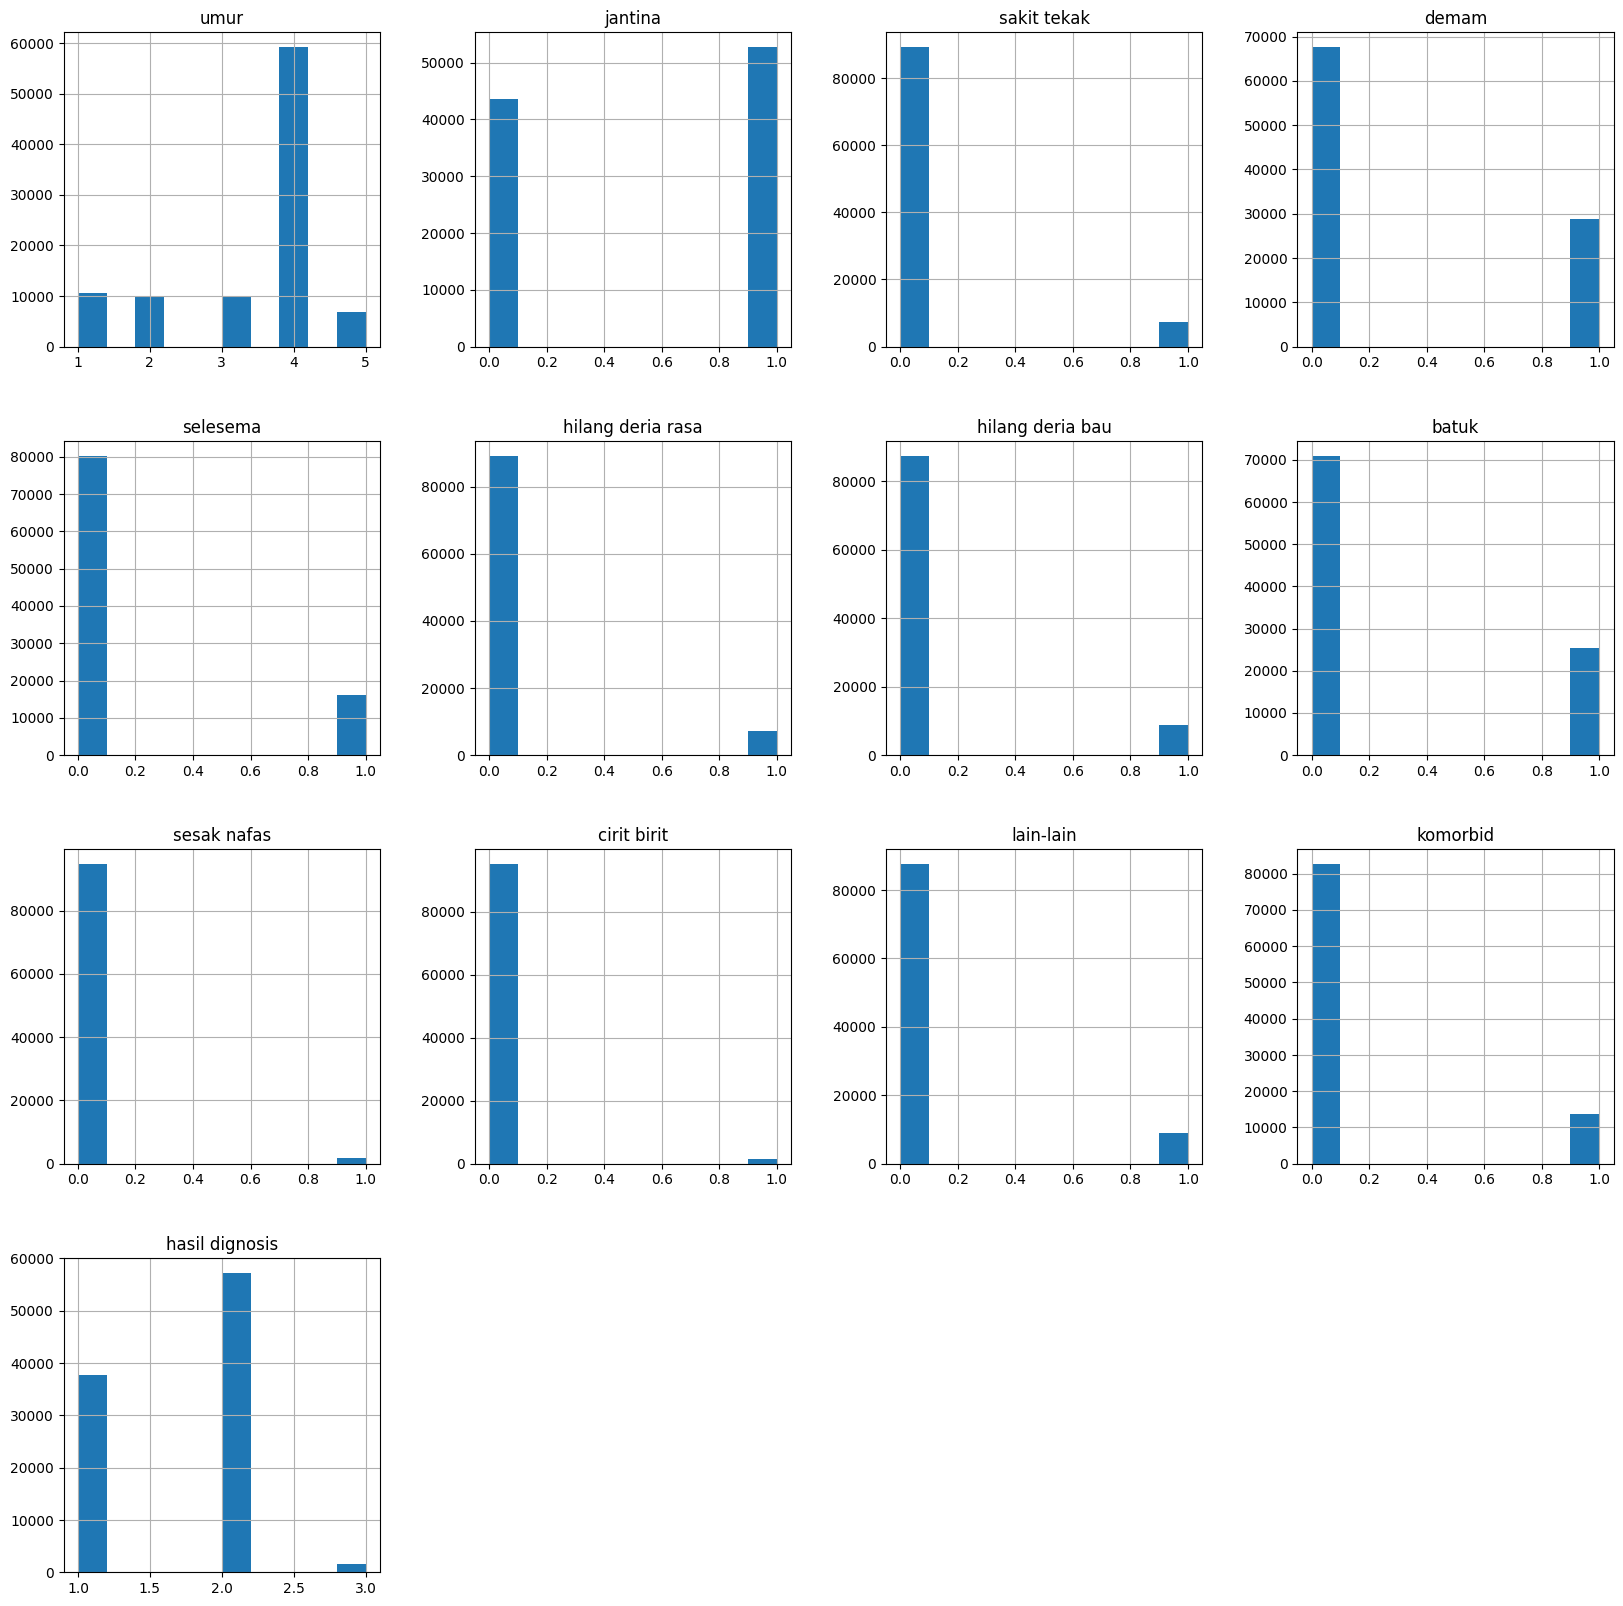

In [ ]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df.hist(ax = ax);

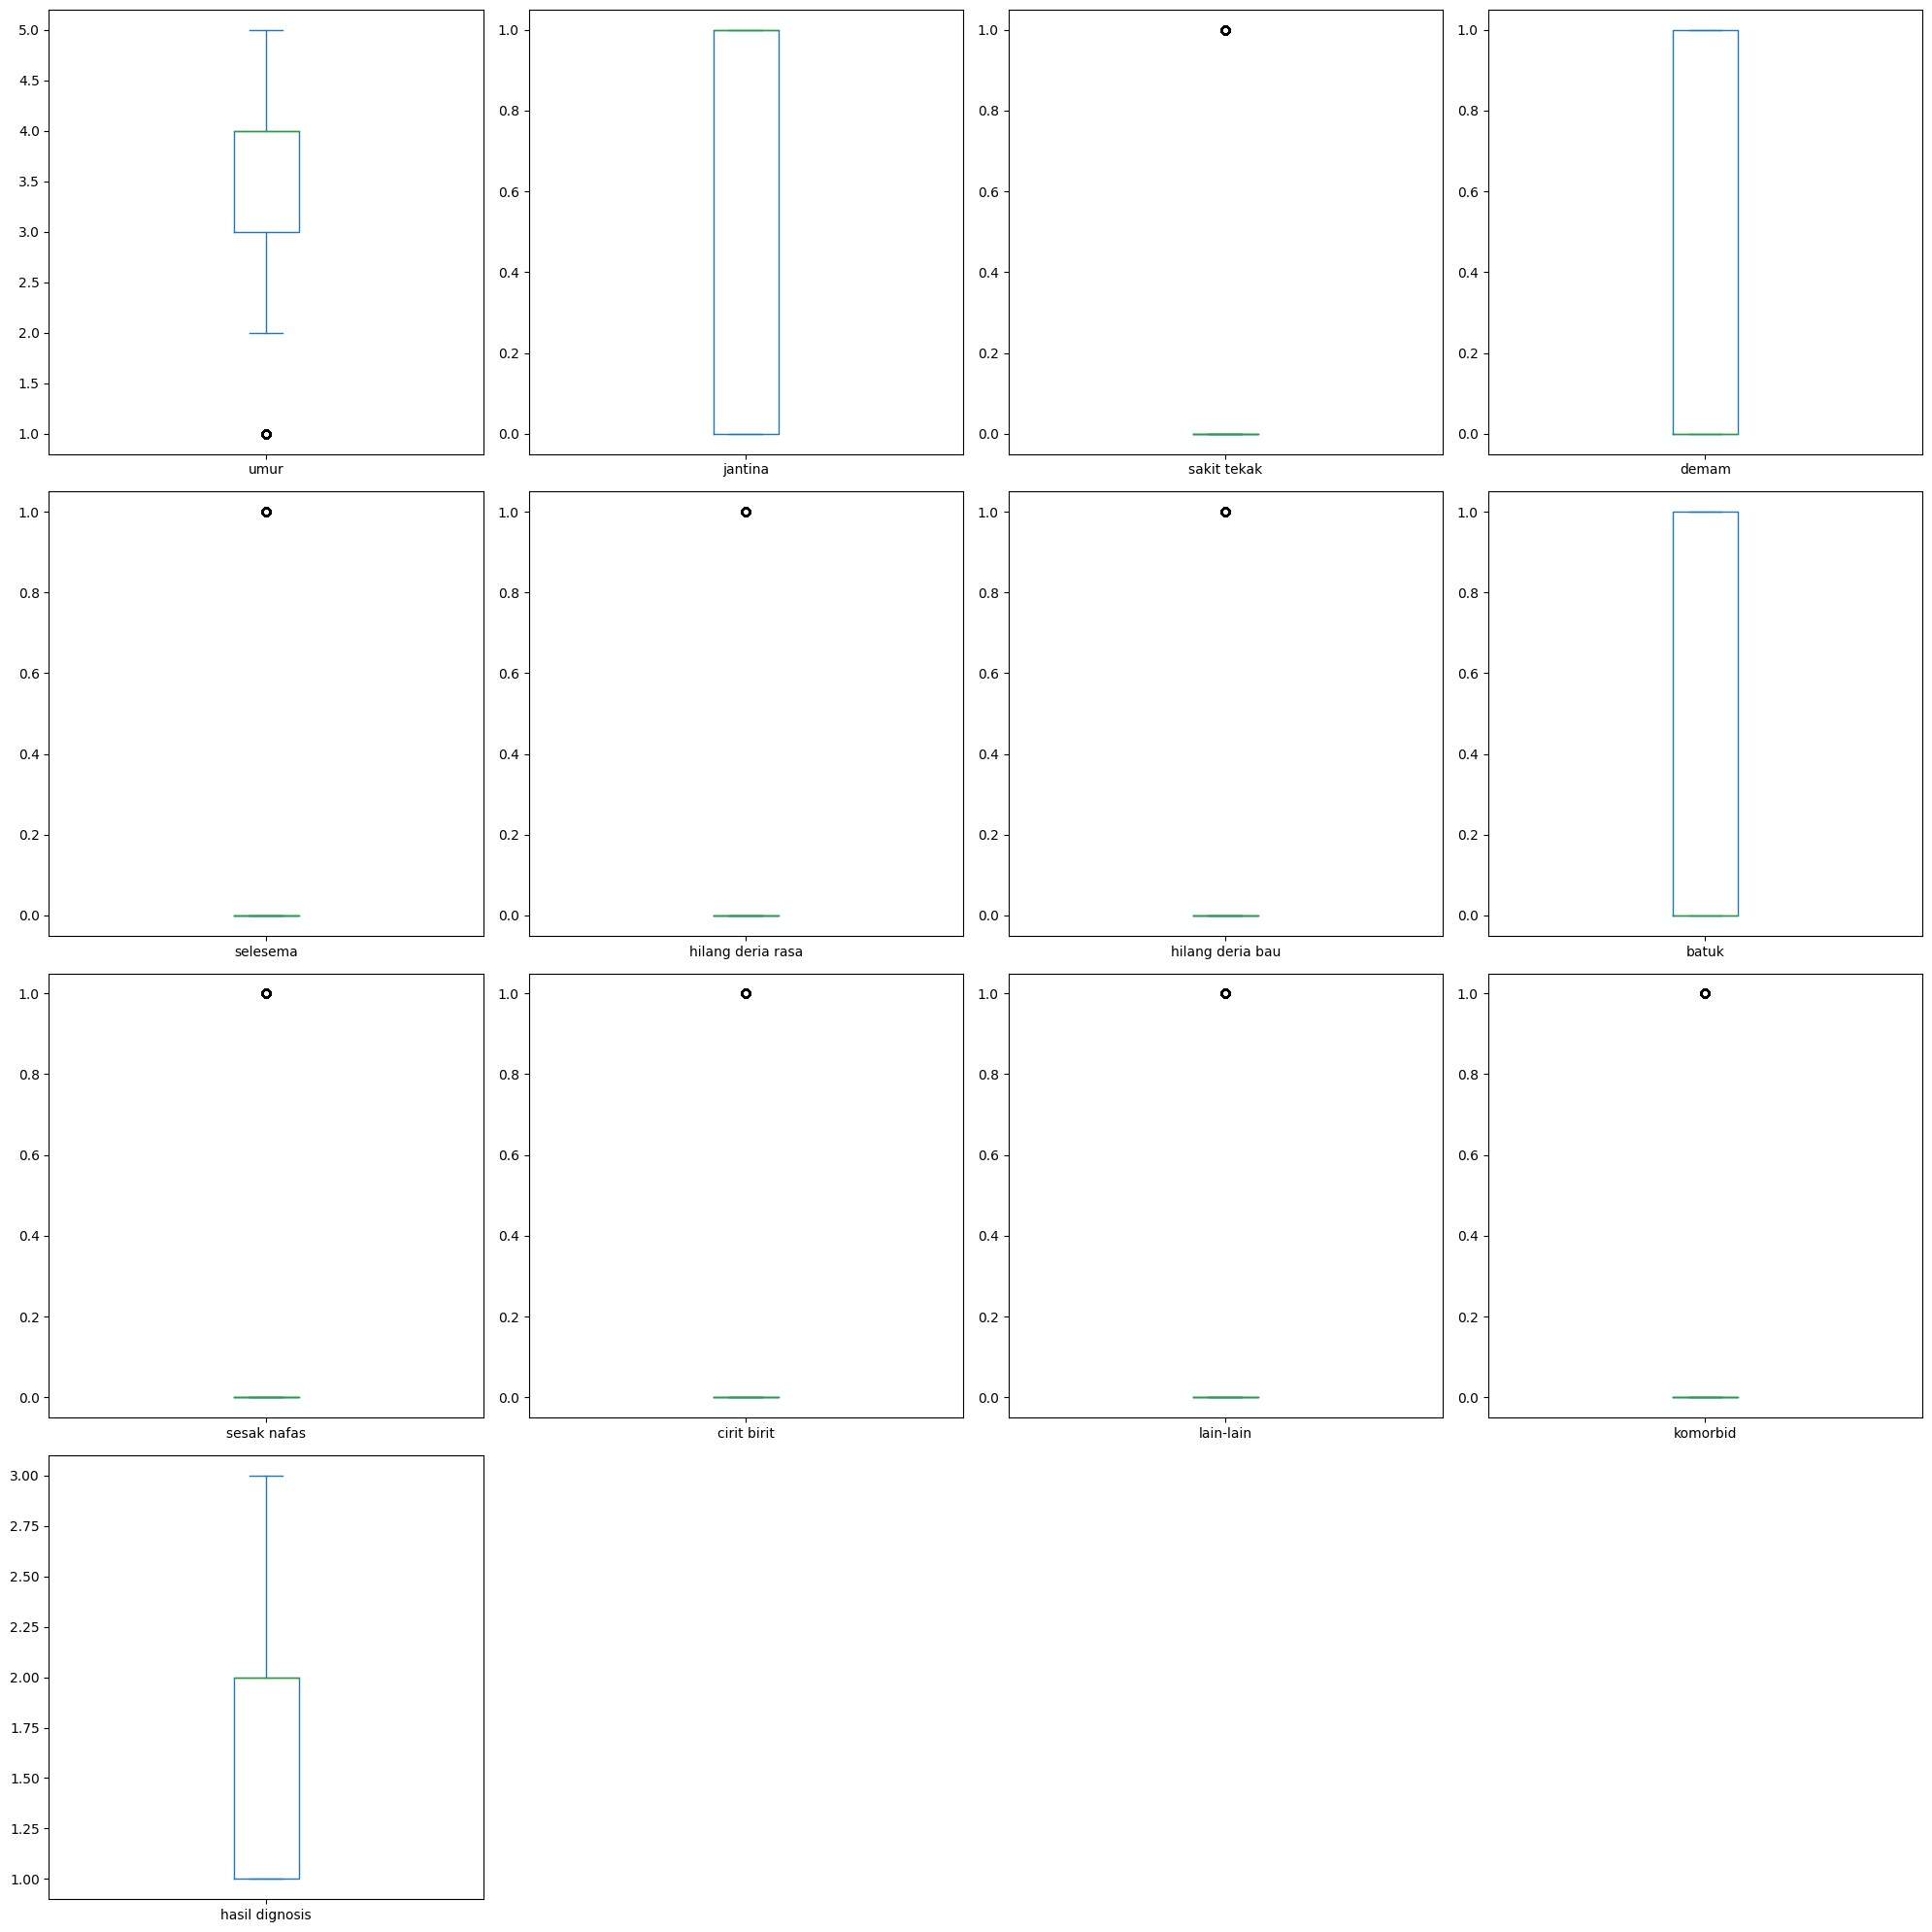

In [ ]:
# Box and Whisker Plots
# Create a figure and axes objects
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate over the columns and plot Box and Whisker Plots
for i, col in enumerate(df.columns):
    df[col].plot(kind='box', ax=axes[i])
    # axes[i].set_title(col)

# Hide any remaining unused subplots
for i in range(13, len(axes)):
    axes[i].axis('off')

# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()

## Correlation matrix

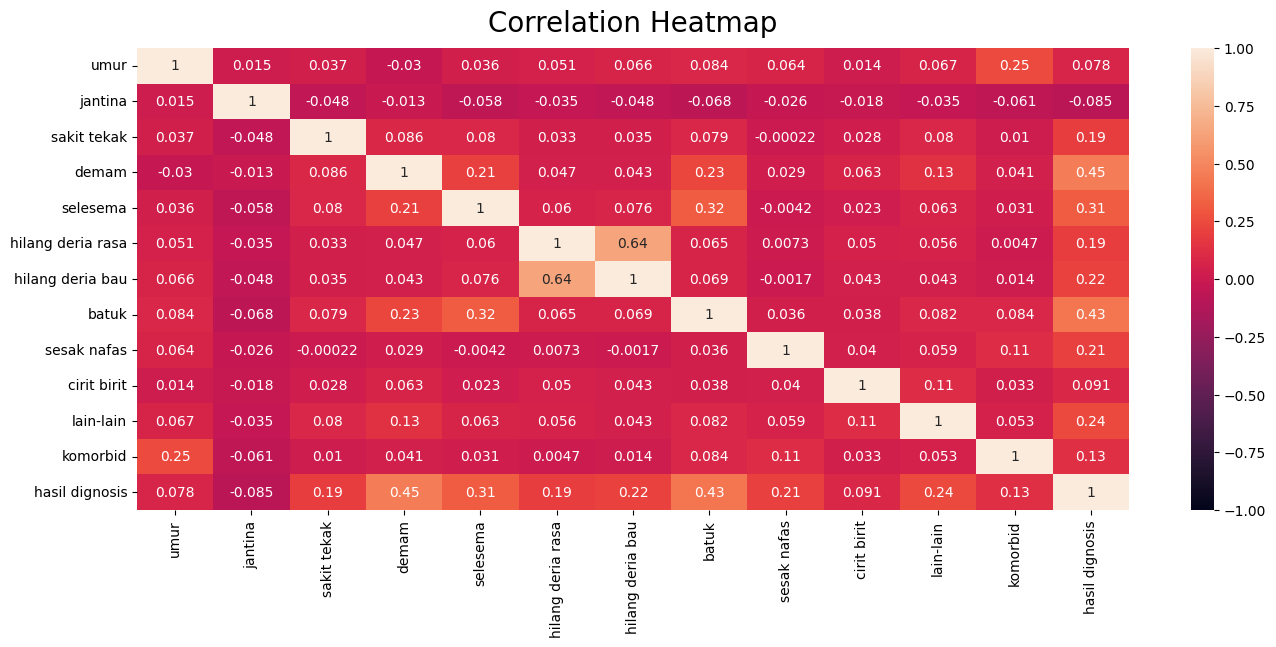

In [ ]:
#data visualization (Heatmap)
plt.figure(figsize=(16,6))
heatmap=sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True)
heatmap.set_title('Correlation Heatmap',fontdict={'fontsize':20},pad=12);

# Train Model

Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

Load data

In [ ]:
data = pd.read_csv("Covid-19 Cleaned Data.csv")
data.head()

,umur,jantina,sakit tekak,demam,selesema,hilang deria rasa,hilang deria bau,batuk,sesak nafas,cirit birit,lain-lain,komorbid,hasil dignosis
0,4,1,0,0,0,0,0,0,0,0,0,0,1
1,4,1,0,0,0,0,0,0,0,0,0,0,1
2,4,1,0,0,0,1,0,1,0,0,0,0,2
3,4,0,0,0,0,0,0,0,0,0,0,0,1
4,4,0,0,0,0,0,0,0,0,0,0,1,2


In [ ]:
# assigning values to features as X and target as Y
X = data.drop(["hasil dignosis"], axis=1)  # Features
y = data["hasil dignosis"]  # Target variable

Standardize data

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Split the dataset into training and testing sets

In [ ]:
# splitting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ", X_test.shape)
print("The shape of y_train is      ", y_train.shape)
print("The shape of y_test is       ", y_test.shape)

The shape of X_train is       (77109, 12)
The shape of X_test is        (19278, 12)
The shape of y_train is       (77109,)
The shape of y_test is        (19278,)


### Decision Tree

In [ ]:
# DecisionTree
model = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None,
                               min_samples_split=2, min_samples_leaf=1,
                               min_weight_fraction_leaf=0.0, max_features=None,
                               random_state=None, max_leaf_nodes=None,
                               min_impurity_decrease=0.0, class_weight=None,
                               ccp_alpha=0.0)

#train the model with train data
model.fit(X_train, y_train)

#Creating label for test data
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

mat = confusion_matrix(y_test, test_pred)

# Train metrics
train_accuracy = accuracy_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred, average='weighted')
train_recall = recall_score(y_train, train_pred, average='weighted')
train_f1_score = f1_score(y_train, train_pred, average='weighted')

# Test metrics
test_accuracy = accuracy_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred, average='weighted')
test_recall = recall_score(y_test, test_pred, average='weighted')
test_f1_score = f1_score(y_test, test_pred, average='weighted')

# Print the metrics
print('Confusion Matrix = \n',mat)

print("Train Accuracy:", train_accuracy)
print("Train Precision:", train_precision)
print("Train Recall:", train_recall)
print("Train F1-Score:", train_f1_score)

print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1-Score:", test_f1_score)

print("AUC: %.3f " % roc_auc_score(y,  model.predict_proba(X), multi_class='ovr'))
print(classification_report(y_test, test_pred, digits=4))

Confusion Matrix = 
 [[ 7157   439     2]
 [  973 10329    90]
 [   31   170    87]]
Train Accuracy: 0.9136936025626062
Train Precision: 0.9142066177276097
Train Recall: 0.9136936025626062
Train F1-Score: 0.9124977022909738
Test Accuracy: 0.9115572154787841
Test Precision: 0.9109328083590578
Test Recall: 0.9115572154787841
Test F1-Score: 0.9102407367919615
AUC: 0.927 
              precision    recall  f1-score   support

           1     0.8770    0.9420    0.9083      7598
           2     0.9443    0.9067    0.9251     11392
           3     0.4860    0.3021    0.3726       288

    accuracy                         0.9116     19278
   macro avg     0.7691    0.7169    0.7353     19278
weighted avg     0.9109    0.9116    0.9102     19278



### Gaussian Naive Bayes

In [ ]:
# Gaussian NB
model = GaussianNB(priors=None, var_smoothing=1e-09)

#train the model with train data
model.fit(X_train, y_train)

#Creating label for test data
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

mat = confusion_matrix(y_test, test_pred)

# Train metrics
train_accuracy = accuracy_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred, average='weighted')
train_recall = recall_score(y_train, train_pred, average='weighted')
train_f1_score = f1_score(y_train, train_pred, average='weighted')

# Test metrics
test_accuracy = accuracy_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred, average='weighted')
test_recall = recall_score(y_test, test_pred, average='weighted')
test_f1_score = f1_score(y_test, test_pred, average='weighted')

# Print the metrics
print('Confusion Matrix = \n',mat)

print("Train Accuracy:", train_accuracy)
print("Train Precision:", train_precision)
print("Train Recall:", train_recall)
print("Train F1-Score:", train_f1_score)

print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1-Score:", test_f1_score)
print("AUC: %.3f " % roc_auc_score(y,  model.predict_proba(X), multi_class='ovr'))
print(classification_report(y_test, test_pred, digits=4))

Confusion Matrix = 
 [[ 7155   426    17]
 [  955 10011   426]
 [   30    99   159]]
Train Accuracy: 0.8965490409679804
Train Precision: 0.9098376495038791
Train Recall: 0.8965490409679804
Train F1-Score: 0.901012468075061
Test Accuracy: 0.8986928104575164
Test Precision: 0.9118683827018663
Test Recall: 0.8986928104575164
Test F1-Score: 0.9032726764300854
AUC: 0.903 
              precision    recall  f1-score   support

           1     0.8790    0.9417    0.9093      7598
           2     0.9502    0.8788    0.9131     11392
           3     0.2641    0.5521    0.3573       288

    accuracy                         0.8987     19278
   macro avg     0.6978    0.7909    0.7265     19278
weighted avg     0.9119    0.8987    0.9033     19278



### Logistic Regression

In [ ]:
# Logistic regression
model = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0,
                           fit_intercept=True, intercept_scaling=1, class_weight=None,
                           random_state=None, solver='lbfgs', max_iter=100, multi_class='auto',
                           verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

#train the model with train data
model.fit(X_train, y_train)

#Creating label for test data
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

mat = confusion_matrix(y_test, test_pred)

# Train metrics
train_accuracy = accuracy_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred, average='weighted')
train_recall = recall_score(y_train, train_pred, average='weighted')
train_f1_score = f1_score(y_train, train_pred, average='weighted')

# Test metrics
test_accuracy = accuracy_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred, average='weighted')
test_recall = recall_score(y_test, test_pred, average='weighted')
test_f1_score = f1_score(y_test, test_pred, average='weighted')

# Print the metrics
print('Confusion Matrix = \n',mat)

print("Train Accuracy:", train_accuracy)
print("Train Precision:", train_precision)
print("Train Recall:", train_recall)
print("Train F1-Score:", train_f1_score)

print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1-Score:", test_f1_score)
print("AUC: %.3f " % roc_auc_score(y,  model.predict_proba(X), multi_class='ovr'))
print(classification_report(y_test, test_pred, digits=4))

Confusion Matrix = 
 [[ 7155   440     3]
 [  955 10372    65]
 [   30   199    59]]
Train Accuracy: 0.9108794044793733
Train Precision: 0.9094021232431089
Train Recall: 0.9108794044793733
Train F1-Score: 0.908452890881805
Test Accuracy: 0.9122315592903828
Test Precision: 0.9100150816909817
Test Recall: 0.9122315592903828
Test F1-Score: 0.909786883554199
AUC: 0.914 
              precision    recall  f1-score   support

           1     0.8790    0.9417    0.9093      7598
           2     0.9420    0.9105    0.9259     11392
           3     0.4646    0.2049    0.2843       288

    accuracy                         0.9122     19278
   macro avg     0.7618    0.6857    0.7065     19278
weighted avg     0.9100    0.9122    0.9098     19278



### Random Forest

In [ ]:
# Random Forest
model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None,
                               min_samples_split=2, min_samples_leaf=1,
                               min_weight_fraction_leaf=0.0, max_features='sqrt',
                               max_leaf_nodes=None, min_impurity_decrease=0.0,
                               bootstrap=True, oob_score=False, n_jobs=None,
                               random_state=None, verbose=0, warm_start=False,
                               class_weight=None, ccp_alpha=0.0, max_samples=None)

#train the model with train data
model.fit(X_train, y_train)

#Creating label for test data
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

mat = confusion_matrix(y_test, test_pred)

# Train metrics
train_accuracy = accuracy_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred, average='weighted')
train_recall = recall_score(y_train, train_pred, average='weighted')
train_f1_score = f1_score(y_train, train_pred, average='weighted')

# Test metrics
test_accuracy = accuracy_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred, average='weighted')
test_recall = recall_score(y_test, test_pred, average='weighted')
test_f1_score = f1_score(y_test, test_pred, average='weighted')

# Print the metrics
print('Confusion Matrix = \n',mat)

print("Train Accuracy:", train_accuracy)
print("Train Precision:", train_precision)
print("Train Recall:", train_recall)
print("Train F1-Score:", train_f1_score)

print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1-Score:", test_f1_score)
print("AUC: %.3f " % roc_auc_score(y,  model.predict_proba(X), multi_class='ovr'))
print(classification_report(y_test, test_pred, digits=4))

Confusion Matrix = 
 [[ 7156   438     4]
 [  961 10341    90]
 [   30   161    97]]
Train Accuracy: 0.9136936025626062
Train Precision: 0.914345684011806
Train Recall: 0.9136936025626062
Train F1-Score: 0.9127691409573401
Test Accuracy: 0.9126465400975204
Test Precision: 0.9123505353904727
Test Recall: 0.9126465400975204
Test F1-Score: 0.9115794205017737
AUC: 0.931 
              precision    recall  f1-score   support

           1     0.8784    0.9418    0.9090      7598
           2     0.9452    0.9077    0.9261     11392
           3     0.5079    0.3368    0.4050       288

    accuracy                         0.9126     19278
   macro avg     0.7772    0.7288    0.7467     19278
weighted avg     0.9124    0.9126    0.9116     19278



### Support Vector Machine

In [ ]:
# Support Vector Machine (SVM)
model = svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True,
                probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False,
                max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)

#training the classifier using X_Train and y_train
model.fit(X_train, y_train)

#Creating label for test data
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

mat = confusion_matrix(y_test, test_pred)

# Train metrics
train_accuracy = accuracy_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred, average='weighted')
train_recall = recall_score(y_train, train_pred, average='weighted')
train_f1_score = f1_score(y_train, train_pred, average='weighted')

# Test metrics
test_accuracy = accuracy_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred, average='weighted')
test_recall = recall_score(y_test, test_pred, average='weighted')
test_f1_score = f1_score(y_test, test_pred, average='weighted')

# Print the metrics
print('Confusion Matrix = \n',mat)

print("Train Accuracy:", train_accuracy)
print("Train Precision:", train_precision)
print("Train Recall:", train_recall)
print("Train F1-Score:", train_f1_score)

print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1-Score:", test_f1_score)
print("AUC: %.3f " % roc_auc_score(y,  model.predict_proba(X), multi_class='ovr'))
print(classification_report(y_test, test_pred, digits=4))

Confusion Matrix = 
 [[ 7155   440     3]
 [  955 10368    69]
 [   30   172    86]]
Train Accuracy: 0.9119947087888574
Train Precision: 0.9115590026736301
Train Recall: 0.9119947087888574
Train F1-Score: 0.9102666202517552
Test Accuracy: 0.9134246291109036
Test Precision: 0.9125625871112487
Test Recall: 0.9134246291109036
Test F1-Score: 0.9118473118915673
AUC: 0.897 
              precision    recall  f1-score   support

           1     0.8790    0.9417    0.9093      7598
           2     0.9443    0.9101    0.9269     11392
           3     0.5443    0.2986    0.3857       288

    accuracy                         0.9134     19278
   macro avg     0.7892    0.7168    0.7406     19278
weighted avg     0.9126    0.9134    0.9118     19278



# Dealing with Imbalanced Model

## Oversampling (SMOTE)

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

data = pd.read_csv("Covid-19 Cleaned Data.csv")

# assigning values to features as X and target as Y
X = data.drop(["hasil dignosis"], axis=1)  # Features
y = data["hasil dignosis"]  # Target variable

scaler = StandardScaler()
X = scaler.fit_transform(X)

# the numbers before smote
num_before = dict(Counter(y))

#perform smoting
over = SMOTE()

# transform the dataset
X_smote, y_smote = over.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=0)

#the numbers after smote
num_after =dict(Counter(y_smote))

print("Numbers before", num_before)
print("Numbers after", num_after)

Numbers before {1: 37686, 2: 57207, 3: 1494}
Numbers after {1: 57207, 2: 57207, 3: 57207}


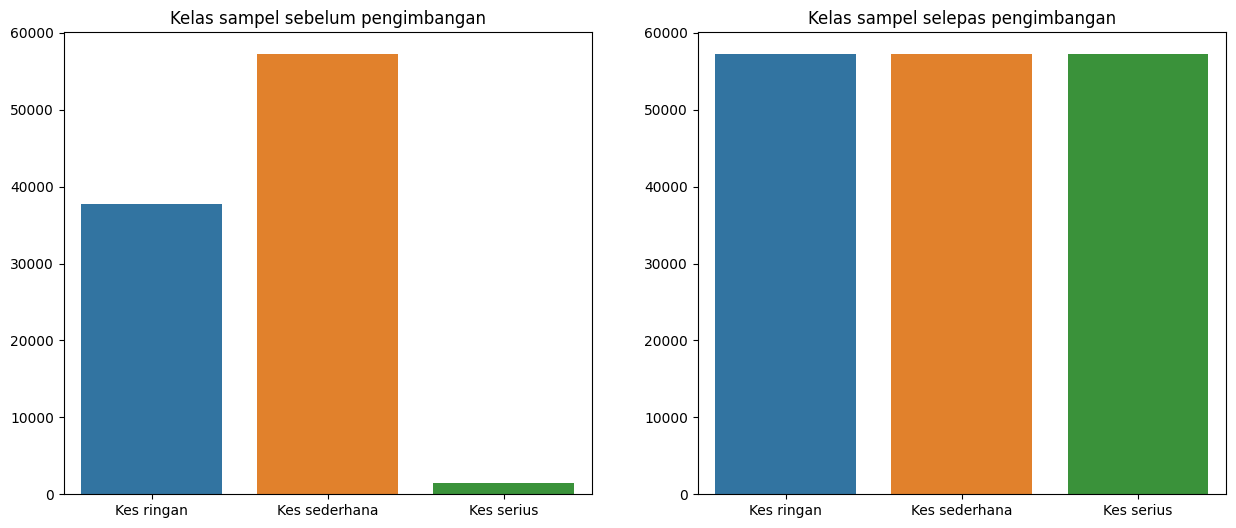

In [ ]:
labels = ["Kes ringan","Kes sederhana","Kes serius"]
values_before = list(num_before.values())
values_after = list(num_after.values())

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=labels, y=values_before)
plt.title("Kelas sampel sebelum pengimbangan")

plt.subplot(1, 2, 2)
sns.barplot(x=labels, y=values_after)
plt.title("Kelas sampel selepas pengimbangan")

plt.show()

### Decision Tree

In [ ]:
# DecisionTree
model = DecisionTreeClassifier()

#train the model with train data
model.fit(X_train, y_train)

#Creating label for test data
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

mat = confusion_matrix(y_test, test_pred)

# Train metrics
train_accuracy = accuracy_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred, average='weighted')
train_recall = recall_score(y_train, train_pred, average='weighted')
train_f1_score = f1_score(y_train, train_pred, average='weighted')

# Test metrics
test_accuracy = accuracy_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred, average='weighted')
test_recall = recall_score(y_test, test_pred, average='weighted')
test_f1_score = f1_score(y_test, test_pred, average='weighted')

# Print the metrics
print('Confusion Matrix = \n',mat)

print("Train Accuracy:", train_accuracy)
print("Train Precision:", train_precision)
print("Train Recall:", train_recall)
print("Train F1-Score:", train_f1_score)

print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1-Score:", test_f1_score)
print("AUC: %.3f " % roc_auc_score(y,  model.predict_proba(X), multi_class='ovr'))
print(classification_report(y_test, test_pred, digits=4))

Confusion Matrix = 
 [[10701   562   225]
 [  953  9816   532]
 [ 1020  1270  9246]]
Train Accuracy: 0.8698141242279455
Train Precision: 0.8733751859748429
Train Recall: 0.8698141242279455
Train F1-Score: 0.8693574492445832
Test Accuracy: 0.8670939548434086
Test Precision: 0.8706829178585971
Test Recall: 0.8670939548434086
Test F1-Score: 0.8666389713617727
AUC: 0.916 
              precision    recall  f1-score   support

           1     0.8443    0.9315    0.8858     11488
           2     0.8427    0.8686    0.8555     11301
           3     0.9243    0.8015    0.8585     11536

    accuracy                         0.8671     34325
   macro avg     0.8705    0.8672    0.8666     34325
weighted avg     0.8707    0.8671    0.8666     34325



### Gaussian Naive Bayes

In [ ]:
# Gaussian NB
model = GaussianNB()

#train the model with train data
model.fit(X_train, y_train)

#Creating label for test data
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

mat = confusion_matrix(y_test, test_pred)

# Train metrics
train_accuracy = accuracy_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred, average='weighted')
train_recall = recall_score(y_train, train_pred, average='weighted')
train_f1_score = f1_score(y_train, train_pred, average='weighted')

# Test metrics
test_accuracy = accuracy_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred, average='weighted')
test_recall = recall_score(y_test, test_pred, average='weighted')
test_f1_score = f1_score(y_test, test_pred, average='weighted')

# Print the metrics
print('Confusion Matrix = \n',mat)

print("Train Accuracy:", train_accuracy)
print("Train Precision:", train_precision)
print("Train Recall:", train_recall)
print("Train F1-Score:", train_f1_score)

print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1-Score:", test_f1_score)
print("AUC: %.3f " % roc_auc_score(y,  model.predict_proba(X), multi_class='ovr'))
print(classification_report(y_test, test_pred, digits=4))

Confusion Matrix = 
 [[10843   524   121]
 [  951  8814  1536]
 [ 1229  2578  7729]]
Train Accuracy: 0.7934098589907936
Train Precision: 0.7937719653126181
Train Recall: 0.7934098589907936
Train F1-Score: 0.7896167365050089
Test Accuracy: 0.7978441369264384
Test Precision: 0.7989363812779267
Test Recall: 0.7978441369264384
Test F1-Score: 0.7943986684197272
AUC: 0.902 
              precision    recall  f1-score   support

           1     0.8326    0.9439    0.8847     11488
           2     0.7397    0.7799    0.7593     11301
           3     0.8235    0.6700    0.7388     11536

    accuracy                         0.7978     34325
   macro avg     0.7986    0.7979    0.7943     34325
weighted avg     0.7989    0.7978    0.7944     34325



### Logistic Regression

In [ ]:
# Logistic regression
model = LogisticRegression()

#train the model with train data
model.fit(X_train, y_train)

#Creating label for test data
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

mat = confusion_matrix(y_test, test_pred)

# Train metrics
train_accuracy = accuracy_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred, average='weighted')
train_recall = recall_score(y_train, train_pred, average='weighted')
train_f1_score = f1_score(y_train, train_pred, average='weighted')

# Test metrics
test_accuracy = accuracy_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred, average='weighted')
test_recall = recall_score(y_test, test_pred, average='weighted')
test_f1_score = f1_score(y_test, test_pred, average='weighted')

# Print the metrics
print('Confusion Matrix = \n',mat)

print("Train Accuracy:", train_accuracy)
print("Train Precision:", train_precision)
print("Train Recall:", train_recall)
print("Train F1-Score:", train_f1_score)

print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1-Score:", test_f1_score)
print("AUC: %.3f " % roc_auc_score(y,  model.predict_proba(X), multi_class='ovr'))
print(classification_report(y_test, test_pred, digits=4))

Confusion Matrix = 
 [[10850   529   109]
 [ 1037  8912  1352]
 [ 1235  2613  7688]]
Train Accuracy: 0.7978455308239133
Train Precision: 0.8002958185062802
Train Recall: 0.7978455308239133
Train F1-Score: 0.7940755164340532
Test Accuracy: 0.7997086671522214
Test Precision: 0.8025641970660797
Test Recall: 0.7997086671522214
Test F1-Score: 0.7961965529542598
AUC: 0.912 
              precision    recall  f1-score   support

           1     0.8269    0.9445    0.8818     11488
           2     0.7393    0.7886    0.7632     11301
           3     0.8403    0.6664    0.7433     11536

    accuracy                         0.7997     34325
   macro avg     0.8022    0.7998    0.7961     34325
weighted avg     0.8026    0.7997    0.7962     34325



### Random Forest

In [ ]:
# Random Forest
model = RandomForestClassifier()

#train the model with train data
model.fit(X_train, y_train)

#Creating label for test data
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

mat = confusion_matrix(y_test, test_pred)

# Train metrics
train_accuracy = accuracy_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred, average='weighted')
train_recall = recall_score(y_train, train_pred, average='weighted')
train_f1_score = f1_score(y_train, train_pred, average='weighted')

# Test metrics
test_accuracy = accuracy_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred, average='weighted')
test_recall = recall_score(y_test, test_pred, average='weighted')
test_f1_score = f1_score(y_test, test_pred, average='weighted')

# Print the metrics
print('Confusion Matrix = \n',mat)

print("Train Accuracy:", train_accuracy)
print("Train Precision:", train_precision)
print("Train Recall:", train_recall)
print("Train F1-Score:", train_f1_score)

print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1-Score:", test_f1_score)
print("AUC: %.3f " % roc_auc_score(y,  model.predict_proba(X), multi_class='ovr'))
print(classification_report(y_test, test_pred, digits=4))

Confusion Matrix = 
 [[10697   570   221]
 [  939  9823   539]
 [ 1006  1260  9270]]
Train Accuracy: 0.8698141242279455
Train Precision: 0.8733318678160418
Train Recall: 0.8698141242279455
Train F1-Score: 0.8693608585457532
Test Accuracy: 0.8678805535324108
Test Precision: 0.8713389743146521
Test Recall: 0.8678805535324108
Test F1-Score: 0.8674473913749949
AUC: 0.920 
              precision    recall  f1-score   support

           1     0.8461    0.9311    0.8866     11488
           2     0.8430    0.8692    0.8559     11301
           3     0.9242    0.8036    0.8597     11536

    accuracy                         0.8679     34325
   macro avg     0.8711    0.8680    0.8674     34325
weighted avg     0.8713    0.8679    0.8674     34325



### Support Vector Machine

In [ ]:
# Support Vector Machine (SVM)
model = svm.SVC(probability=True)

#train the model with train data
model.fit(X_train, y_train)

#Creating label for test data
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

mat = confusion_matrix(y_test, test_pred)

# Train metrics
train_accuracy = accuracy_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred, average='weighted')
train_recall = recall_score(y_train, train_pred, average='weighted')
train_f1_score = f1_score(y_train, train_pred, average='weighted')

# Test metrics
test_accuracy = accuracy_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred, average='weighted')
test_recall = recall_score(y_test, test_pred, average='weighted')
test_f1_score = f1_score(y_test, test_pred, average='weighted')

# Print the metrics
print('Confusion Matrix = \n',mat)

print("Train Accuracy:", train_accuracy)
print("Train Precision:", train_precision)
print("Train Recall:", train_recall)
print("Train F1-Score:", train_f1_score)

print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1-Score:", test_f1_score)
print("AUC: %.3f " % roc_auc_score(y,  model.predict_proba(X), multi_class='ovr'))
print(classification_report(y_test, test_pred, digits=4))

Confusion Matrix = 
 [[10843   575    70]
 [  951  9497   853]
 [ 1234  1938  8364]]
Train Accuracy: 0.83422678009556
Train Precision: 0.8393844624542784
Train Recall: 0.83422678009556
Train F1-Score: 0.8321302528878711
Test Accuracy: 0.8362418062636562
Test Precision: 0.8415765564374449
Test Recall: 0.8362418062636562
Test F1-Score: 0.8343013490132791
AUC: 0.911 
              precision    recall  f1-score   support

           1     0.8323    0.9439    0.8846     11488
           2     0.7908    0.8404    0.8148     11301
           3     0.9006    0.7250    0.8033     11536

    accuracy                         0.8362     34325
   macro avg     0.8412    0.8364    0.8342     34325
weighted avg     0.8416    0.8362    0.8343     34325



## Undersampling (NearMiss- 3)

In [ ]:
from imblearn.under_sampling import NearMiss
from collections import Counter

data = pd.read_csv("Covid-19 Cleaned Data.csv")

# assigning values to features as X and target as Y
X = data.drop(["hasil dignosis"], axis=1)  # Features
y = data["hasil dignosis"]  # Target variable

scaler = StandardScaler()
X = scaler.fit_transform(X)

# the numbers before undersampling
num_before = dict(Counter(y))

#perform undersampling
under = NearMiss(version=3)

# transform the dataset
X_smote, y_smote = under.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=0)

#the numbers after undersampling
num_after =dict(Counter(y_smote))

print("Numbers before", num_before)
print("Numbers after", num_after)

/usr/local/lib/python3.10/dist-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:203: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


Numbers before {1: 37686, 2: 57207, 3: 1494}
Numbers after {1: 599, 2: 1263, 3: 1494}


/usr/local/lib/python3.10/dist-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:203: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


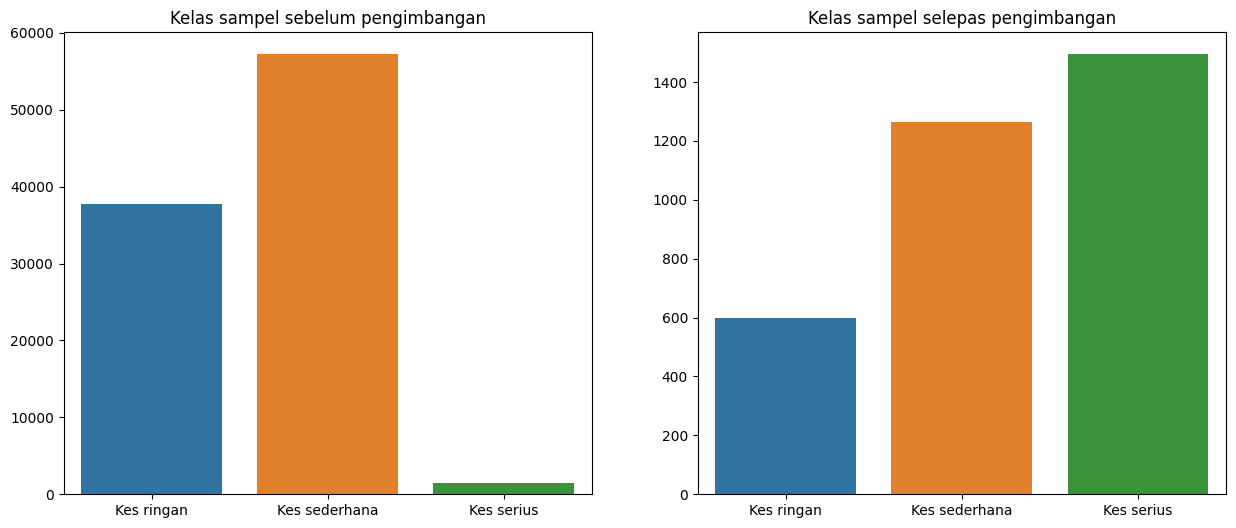

In [ ]:
labels = ["Kes ringan","Kes sederhana","Kes serius"]
values_before = list(num_before.values())
values_after = list(num_after.values())

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=labels, y=values_before)
plt.title("Kelas sampel sebelum pengimbangan")

plt.subplot(1, 2, 2)
sns.barplot(x=labels, y=values_after)
plt.title("Kelas sampel selepas pengimbangan")

plt.show()

### Decision Tree

In [ ]:
# DecisionTree
model = DecisionTreeClassifier()

#train the model with train data
model.fit(X_train, y_train)

#Creating label for test data
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

mat = confusion_matrix(y_test, test_pred)

# Train metrics
train_accuracy = accuracy_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred, average='weighted')
train_recall = recall_score(y_train, train_pred, average='weighted')
train_f1_score = f1_score(y_train, train_pred, average='weighted')

# Test metrics
test_accuracy = accuracy_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred, average='weighted')
test_recall = recall_score(y_test, test_pred, average='weighted')
test_f1_score = f1_score(y_test, test_pred, average='weighted')

# Print the metrics
print('Confusion Matrix = \n',mat)

print("Train Accuracy:", train_accuracy)
print("Train Precision:", train_precision)
print("Train Recall:", train_recall)
print("Train F1-Score:", train_f1_score)

print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1-Score:", test_f1_score)
print("AUC: %.3f " % roc_auc_score(y,  model.predict_proba(X), multi_class='ovr'))
print(classification_report(y_test, test_pred, digits=4))

Confusion Matrix = 
 [[ 28  63  38]
 [ 43 121  97]
 [ 30  86 166]]
Train Accuracy: 0.6982116244411326
Train Precision: 0.7014672496308774
Train Recall: 0.6982116244411326
Train F1-Score: 0.6995093868473795
Test Accuracy: 0.46875
Test Precision: 0.4587063059355294
Test Recall: 0.46875
Test F1-Score: 0.4627200887686351
AUC: 0.580 
              precision    recall  f1-score   support

           1     0.2772    0.2171    0.2435       129
           2     0.4481    0.4636    0.4557       261
           3     0.5515    0.5887    0.5695       282

    accuracy                         0.4688       672
   macro avg     0.4256    0.4231    0.4229       672
weighted avg     0.4587    0.4688    0.4627       672



### Gaussian Naive Bayes

In [ ]:
# Gaussian NB
model = GaussianNB()

#train the model with train data
model.fit(X_train, y_train)

#Creating label for test data
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

mat = confusion_matrix(y_test, test_pred)

# Train metrics
train_accuracy = accuracy_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred, average='weighted')
train_recall = recall_score(y_train, train_pred, average='weighted')
train_f1_score = f1_score(y_train, train_pred, average='weighted')

# Test metrics
test_accuracy = accuracy_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred, average='weighted')
test_recall = recall_score(y_test, test_pred, average='weighted')
test_f1_score = f1_score(y_test, test_pred, average='weighted')

# Print the metrics
print('Confusion Matrix = \n',mat)

print("Train Accuracy:", train_accuracy)
print("Train Precision:", train_precision)
print("Train Recall:", train_recall)
print("Train F1-Score:", train_f1_score)

print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1-Score:", test_f1_score)
print("AUC: %.3f " % roc_auc_score(y,  model.predict_proba(X), multi_class='ovr'))
print(classification_report(y_test, test_pred, digits=4))

Confusion Matrix = 
 [[ 46  24  59]
 [ 56  88 117]
 [ 31  52 199]]
Train Accuracy: 0.5432190760059612
Train Precision: 0.5435651337868691
Train Recall: 0.5432190760059612
Train F1-Score: 0.5314002864199271
Test Accuracy: 0.4955357142857143
Test Precision: 0.4974900622636731
Test Recall: 0.4955357142857143
Test F1-Score: 0.48246051493203507
AUC: 0.611 
              precision    recall  f1-score   support

           1     0.3459    0.3566    0.3511       129
           2     0.5366    0.3372    0.4141       261
           3     0.5307    0.7057    0.6058       282

    accuracy                         0.4955       672
   macro avg     0.4710    0.4665    0.4570       672
weighted avg     0.4975    0.4955    0.4825       672



### Logistic Regression

In [ ]:
# Logistic regression
model = LogisticRegression()

#train the model with train data
model.fit(X_train, y_train)

#Creating label for test data
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

mat = confusion_matrix(y_test, test_pred)

# Train metrics
train_accuracy = accuracy_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred, average='weighted')
train_recall = recall_score(y_train, train_pred, average='weighted')
train_f1_score = f1_score(y_train, train_pred, average='weighted')

# Test metrics
test_accuracy = accuracy_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred, average='weighted')
test_recall = recall_score(y_test, test_pred, average='weighted')
test_f1_score = f1_score(y_test, test_pred, average='weighted')

# Print the metrics
print('Confusion Matrix = \n',mat)

print("Train Accuracy:", train_accuracy)
print("Train Precision:", train_precision)
print("Train Recall:", train_recall)
print("Train F1-Score:", train_f1_score)

print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1-Score:", test_f1_score)
print("AUC: %.3f " % roc_auc_score(y,  model.predict_proba(X), multi_class='ovr'))
print(classification_report(y_test, test_pred, digits=4))

Confusion Matrix = 
 [[ 16  54  59]
 [ 16 124 121]
 [  5  84 193]]
Train Accuracy: 0.5644560357675111
Train Precision: 0.5447780083301405
Train Recall: 0.5644560357675111
Train F1-Score: 0.5348963726584021
Test Accuracy: 0.4955357142857143
Test Precision: 0.48396534294094823
Test Recall: 0.4955357142857143
Test F1-Score: 0.4684771365048426
AUC: 0.684 
              precision    recall  f1-score   support

           1     0.4324    0.1240    0.1928       129
           2     0.4733    0.4751    0.4742       261
           3     0.5174    0.6844    0.5893       282

    accuracy                         0.4955       672
   macro avg     0.4744    0.4278    0.4188       672
weighted avg     0.4840    0.4955    0.4685       672



### Random Forest

In [ ]:
# Random Forest
model = RandomForestClassifier()

#train the model with train data
model.fit(X_train, y_train)

#Creating label for test data
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

mat = confusion_matrix(y_test, test_pred)

# Train metrics
train_accuracy = accuracy_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred, average='weighted')
train_recall = recall_score(y_train, train_pred, average='weighted')
train_f1_score = f1_score(y_train, train_pred, average='weighted')

# Test metrics
test_accuracy = accuracy_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred, average='weighted')
test_recall = recall_score(y_test, test_pred, average='weighted')
test_f1_score = f1_score(y_test, test_pred, average='weighted')

# Print the metrics
print('Confusion Matrix = \n',mat)

print("Train Accuracy:", train_accuracy)
print("Train Precision:", train_precision)
print("Train Recall:", train_recall)
print("Train F1-Score:", train_f1_score)

print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1-Score:", test_f1_score)
print("AUC: %.3f " % roc_auc_score(y,  model.predict_proba(X), multi_class='ovr'))
print(classification_report(y_test, test_pred, digits=4))

Confusion Matrix = 
 [[ 20  64  45]
 [ 35 112 114]
 [ 13  93 176]]
Train Accuracy: 0.6982116244411326
Train Precision: 0.6956914429328455
Train Recall: 0.6982116244411326
Train F1-Score: 0.6942086500192937
Test Accuracy: 0.4583333333333333
Test Precision: 0.4386392043639849
Test Recall: 0.4583333333333333
Test F1-Score: 0.4425357335396488
AUC: 0.600 
              precision    recall  f1-score   support

           1     0.2941    0.1550    0.2030       129
           2     0.4164    0.4291    0.4226       261
           3     0.5254    0.6241    0.5705       282

    accuracy                         0.4583       672
   macro avg     0.4119    0.4028    0.3987       672
weighted avg     0.4386    0.4583    0.4425       672



### Support Vector Machine

In [ ]:
# Support Vector Machine (SVM)
model = svm.SVC(probability=True)

#train the model with train data
model.fit(X_train, y_train)

#Creating label for test data
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

mat = confusion_matrix(y_test, test_pred)

# Train metrics
train_accuracy = accuracy_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred, average='weighted')
train_recall = recall_score(y_train, train_pred, average='weighted')
train_f1_score = f1_score(y_train, train_pred, average='weighted')

# Test metrics
test_accuracy = accuracy_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred, average='weighted')
test_recall = recall_score(y_test, test_pred, average='weighted')
test_f1_score = f1_score(y_test, test_pred, average='weighted')

# Print the metrics
print('Confusion Matrix = \n',mat)

print("Train Accuracy:", train_accuracy)
print("Train Precision:", train_precision)
print("Train Recall:", train_recall)
print("Train F1-Score:", train_f1_score)

print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1-Score:", test_f1_score)
print("AUC: %.3f " % roc_auc_score(y,  model.predict_proba(X), multi_class='ovr'))
print(classification_report(y_test, test_pred, digits=4))

Confusion Matrix = 
 [[  1  70  58]
 [  2 150 109]
 [  0  84 198]]
Train Accuracy: 0.5838301043219076
Train Precision: 0.5940883559899405
Train Recall: 0.5838301043219076
Train F1-Score: 0.5335295626601803
Test Accuracy: 0.5193452380952381
Test Precision: 0.48327118631338617
Test Recall: 0.5193452380952381
Test F1-Score: 0.4659796237083256
AUC: 0.608 
              precision    recall  f1-score   support

           1     0.3333    0.0078    0.0152       129
           2     0.4934    0.5747    0.5310       261
           3     0.5425    0.7021    0.6121       282

    accuracy                         0.5193       672
   macro avg     0.4564    0.4282    0.3861       672
weighted avg     0.4833    0.5193    0.4660       672



# T-test

### T-test for DT and RF

In [ ]:
from scipy import stats

In [ ]:
alpha = 0.05
dt_test = [0.912, 0.911, 0.912, 0.910, 0.928]
rf_test = [0.912, 0.912, 0.912, 0.911, 0.931]

print("H0: Performance of Decision Tree is not higher than Random Forest")
print("and no significant mean difference between each other. DT <= RF")
print("H1: Performace of Decision Tree is higher than Random Forest ")
print("and there is significant mean difference between each other. DT > RF")
print(' ')

t_value, p_value = stats.ttest_rel(dt_test, rf_test)
one_tailed_p_value = float("{:.6f}".format(p_value/2))
print('Test statistic is %f'%float("{:.6f}".format(t_value)))
print('p-value for one_tailed_test is %f'%one_tailed_p_value)
print('')
alpha = 0.05

if one_tailed_p_value <= alpha:
    print('In conclusion','since p-value(=%f)'%one_tailed_p_value,'<','alpha(=%.2f)'%alpha,
          '''We reject the null hypothesis H0. So we conclude that performance of Decision Tree is higher than Random Forest
          and there is significant difference between each other at %.2f level of significance. (DT > RF)'''%alpha
    )
else:
    print('In conclusion','since p-value(=%f)'%one_tailed_p_value,'>','alpha(=%.2f)'%alpha,
          '''We do not reject the null hypothesis H0. So we conclude that performance of Decision Tree is not higher than Random Forest
          and no significant difference between each other at %.2f level of significance. (DT <= RF)'''%alpha
    )

H0: Performance of Decision Tree is not higher than Random Forest
and no significant mean difference between each other. DT <= RF
H1: Performace of Decision Tree is higher than Random Forest 
and there is significant mean difference between each other. DT > RF
 
Test statistic is -1.825742
p-value for one_tailed_test is 0.070964

In conclusion since p-value(=0.070964) > alpha(=0.05) We do not reject the null hypothesis H0. So we conclude that performance of Decision Tree is not higher than Random Forest
          and no significant difference between each other at 0.05 level of significance. (DT <= RF)


# Prediction Model

In [ ]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import Pipeline
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

data = pd.read_csv("Covid-19 Cleaned Data.csv")

# assigning values to features as X and target as Y
X = data.drop(["hasil dignosis"], axis=1)  # Features
y = data["hasil dignosis"]  # Target variable

scaler = StandardScaler()
X = scaler.fit_transform(X)

# splitting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Random Forest
model = RandomForestClassifier()

#train the model with train data
model.fit(X_train, y_train)

#Creating label for test data
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

mat = confusion_matrix(y_test, test_pred)

# Print the metrics
print('Confusion Matrix = \n',mat)
print("AUC: %.3f " % roc_auc_score(y,  model.predict_proba(X), multi_class='ovr'))
print(classification_report(y_test, test_pred, digits=4))

Confusion Matrix = 
 [[10657   640     4]
 [ 1487 15548   129]
 [   54   250   148]]
AUC: 0.922 
              precision    recall  f1-score   support

           1     0.8737    0.9430    0.9070     11301
           2     0.9459    0.9058    0.9254     17164
           3     0.5267    0.3274    0.4038       452

    accuracy                         0.9113     28917
   macro avg     0.7821    0.7254    0.7454     28917
weighted avg     0.9111    0.9113    0.9101     28917



In [ ]:
# Test Case 1
prediction = model.predict([[5, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1]])

if prediction[0] == 1:
    print('You are in mild condition')
elif prediction[0] == 2:
    print('You are in moderate condition')
elif prediction[0] == 3:
    print('You are in severe condition')
else:
    print('Invalid prediction')

You are in moderate condition


In [ ]:
# Test Case 2
prediction = model.predict([[2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1]])

if prediction[0] == 1:
    print('You are in mild condition')
elif prediction[0] == 2:
    print('You are in moderate condition')
elif prediction[0] == 3:
    print('You are in severe condition')
else:
    print('Invalid prediction')

You are in moderate condition


In [ ]:
# Test Case 3
prediction = model.predict([[4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

if prediction[0] == 1:
    print('You are in mild condition')
elif prediction[0] == 2:
    print('You are in moderate condition')
elif prediction[0] == 3:
    print('You are in severe condition')
else:
    print('Invalid prediction')

You are in mild condition


In [ ]:
# Test Case 4
prediction = model.predict([[4, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0]])

if prediction[0] == 1:
    print('You are in mild condition')
elif prediction[0] == 2:
    print('You are in moderate condition')
elif prediction[0] == 3:
    print('You are in severe condition')
else:
    print('Invalid prediction')

You are in moderate condition


In [ ]:
# Test Case 5
prediction = model.predict([[4, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0]])

if prediction[0] == 1:
    print('You are in mild condition')
elif prediction[0] == 2:
    print('You are in moderate condition')
elif prediction[0] == 3:
    print('You are in severe condition')
else:
    print('Invalid prediction')

You are in moderate condition


In [ ]:
# Test Case 6
prediction = model.predict([[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

if prediction[0] == 1:
    print('You are in mild condition')
elif prediction[0] == 2:
    print('You are in moderate condition')
elif prediction[0] == 3:
    print('You are in severe condition')
else:
    print('Invalid prediction')

You are in mild condition


In [ ]:
# Test Case 7
prediction = model.predict([[3, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

if prediction[0] == 1:
    print('You are in mild condition')
elif prediction[0] == 2:
    print('You are in moderate condition')
elif prediction[0] == 3:
    print('You are in severe condition')
else:
    print('Invalid prediction')

You are in moderate condition


In [ ]:
# Test Case 8
prediction = model.predict([[2, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0]])

if prediction[0] == 1:
    print('You are in mild condition')
elif prediction[0] == 2:
    print('You are in moderate condition')
elif prediction[0] == 3:
    print('You are in severe condition')
else:
    print('Invalid prediction')

You are in moderate condition


In [ ]:
# Test Case 9
prediction = model.predict([[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

if prediction[0] == 1:
    print('You are in mild condition')
elif prediction[0] == 2:
    print('You are in moderate condition')
elif prediction[0] == 3:
    print('You are in severe condition')
else:
    print('Invalid prediction')

You are in moderate condition


In [ ]:
# Test Case 10
prediction = model.predict([[5, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0]])

if prediction[0] == 1:
    print('You are in mild condition')
elif prediction[0] == 2:
    print('You are in moderate condition')
elif prediction[0] == 3:
    print('You are in severe condition')
else:
    print('Invalid prediction')

You are in moderate condition
